<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Техническое-задание" data-toc-modified-id="Техническое-задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Техническое задание</a></span></li><li><span><a href="#Используемые-ресурсы" data-toc-modified-id="Используемые-ресурсы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Используемые ресурсы</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Результаты-предобработки-данных" data-toc-modified-id="Результаты-предобработки-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Результаты предобработки данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Построение-прогнозной-модели" data-toc-modified-id="Построение-прогнозной-модели-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Построение прогнозной модели</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Техническое задание

**Изобразить графически как за последние 10 лет изменилась численность населения Дубая и предложить свой вариант прогноза, используя наиболее подходящий на ваш взгляд подход.**

**Формат предоставления данных: в любом удобном формате**

## Используемые ресурсы

При выборе датасета для работы были проанализированы следующие источники информации:

1) Федеральное агентство по статистике ОАЭ (Federal Competitiveness and Statistics Authority, FCSA): Они являются главным органом по сбору и публикации статистических данных в ОАЭ. Их веб-сайт может содержать информацию о населении ОАЭ и отдельных эмиратах, включая Дубай. Ссылка на ресурс: https://uaestat.fcsc.gov.ae/en

2) Правительственные порталы Дубая и других эмиратов: Официальные веб-сайты правительственных органов Дубая и других эмиратов также могут предоставлять доступ к статистическим данным о населении и демографии. Ссылка на ресурс: https://bayanat.ae/en/Data

3) Организация Объединенных Наций (United Nations): Сайт Организации Объединенных Наций может содержать данные о населении ОАЭ, включая информацию по эмиратам. Ссылка на ресурс: https://data.un.org/

4) Международные организации и исследовательские институты: Некоторые международные организации и исследовательские институты также могут предоставлять статистические данные о населении ОАЭ. Например, Всемирный банк, Международный валютный фонд (МВФ) и Организация экономического сотрудничества и развития (ОЭСР) имеют базы данных и отчеты, которые могут включать информацию о населении.Ссылка на ресурс: https://data.imf.org/

Проблема заключается в том что, большинство датасетов содержат данные по популяции населения до 2020года включительно и нет разделения на конкретные Эмираты. Для работы был использован датасет с государственного портала Эмирата Дубая https://bayanat.ae/en/Data Данные за период с 1975 по 2005 год, однако есть очень важное разделение населения по конкретным регионам  страны, что является самым важным критерием в ТЗ.

## Описание данных

Датасет содержит 5 столбцов:  

Emirates_EN - название Эмирата  
Nationality_EN - гражданин/иностранец  
sex_EN - пол  
year - год  
value - количество  

## Предобработка данных

Загрузим основные библиотеки для работы с данными.

In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

import plotly.express as px 
import re 
import math as mth 
from statsmodels.tsa.holtwinters import ExponentialSmoothing


from IPython.display import display
from scipy import stats as st  #AB test
from plotly import graph_objects as go
import warnings
warnings.filterwarnings("ignore")

Загруженный датасет представляет собой таблицу формат xlsx. Запишем датасет в переменную и воспользуемся методом pd.read_excel для открытия файла формата excel.

In [8]:
df = pd.read_excel('C:/Users/truel/datasets/UAE_population.xlsx', sheet_name='Sheet1')

Теперь посмотрим на датасет и проведем необходимую предобработку данных.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Emirates_EN     140 non-null    object
 1   Nationality_EN  140 non-null    object
 2   sex_EN          140 non-null    object
 3   year            140 non-null    int64 
 4   value           140 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 5.6+ KB


Датасет содержит 5 столбцов и 140 строк. Представлены данные в формате object и int64.

Посмотрим на первые 5 строк датасета.

In [4]:
df.head()

,Emirates_EN,Nationality_EN,sex_EN,year,value
0,Abu Dhabi,National,Male,1975,29238
1,Dubai,National,Male,1975,26096
2,Al Sharjah,National,Male,1975,21318
3,Ajman,National,Male,1975,3933
4,Umm Al - Quwain,National,Male,1975,2301


Проверим датасет на пропуски с помощью метода isna().sum()

In [10]:
df.isna().sum()

Emirates_EN       0
Nationality_EN    0
sex_EN            0
year              0
value             0
dtype: int64

Датасет не содержит пропущенных значений.

Выполним проверку на дубликаты с помощью метода duplicated().sum()

In [11]:
df.duplicated().sum()

0

Датасет не содержит дубликатов.

### Результаты предобработки данных

В результате предобработки данных датасет был проверен на пропуски, дубликаты. Данные чистые и не требуют дополнительной предобработки.

## Анализ данных

В соответствии с ТЗ необходимо построить график отражающий рост численности населения эмирата Дубай. Для начала посмотрим данные за какой временной промежуток представлены в датасете. Воспользуемся методом value_counts()

In [26]:
df['year'].value_counts()

1975    28
1980    28
1985    28
1995    28
2005    28
Name: year, dtype: int64

В датасете представлены данные за период с 1975 по 2005 год.

Построим линейный график и посмотрим как в целом менялось население ОАЭ за весь временной период представленный в датасете.

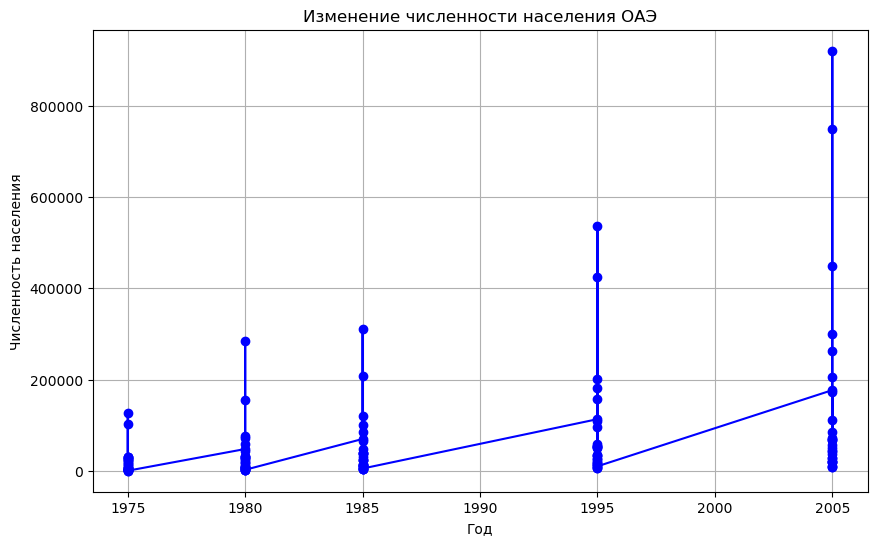

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['value'], marker='o', linestyle='-', color='b')
plt.xlabel('Год')
plt.ylabel('Численность населения')
plt.title('Изменение численности населения ОАЭ')
plt.grid(True)
plt.show()

Как видно на графике, рост населения ОАЭ наблюдается на всем временном отрезке. Наибольший рост наблюдается в период с 1995 по 2005 год.

Выполним фильтрацию данных, нас интересует только изменения количества населения эмирата Дубай. Также нас интересуют данные за последние 10 лет. Так как более свежих данных в открытых источниках информации не встречается, то будем учитывать только данные после 1995 года.

In [20]:
dubai_data = df[df['Emirates_EN'] == 'Dubai']
last_10_years = dubai_data[dubai_data['year'] >= 1995]

Построим линейный график для наглядного отображения данных. Воспользуемся методом plt.figure

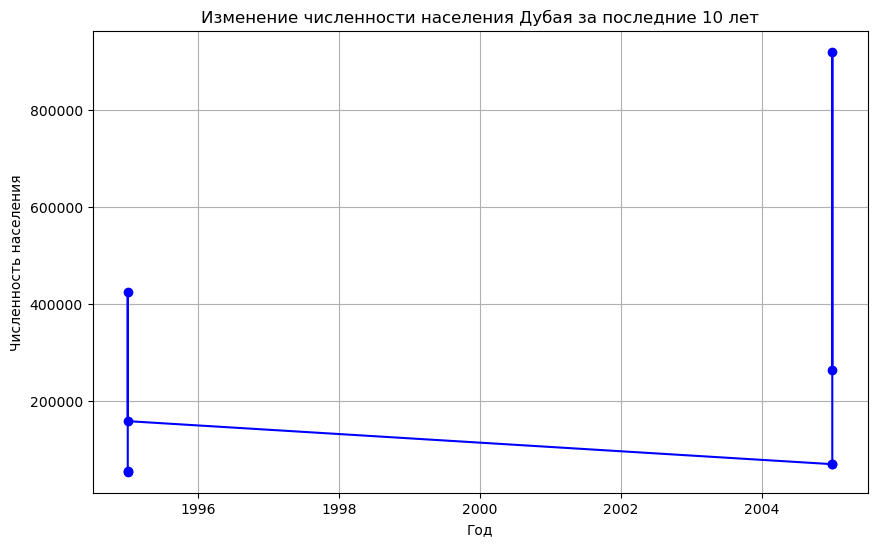

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(last_10_years['year'], last_10_years['value'], marker='o', linestyle='-', color='b')
plt.xlabel('Год')
plt.ylabel('Численность населения')
plt.title('Изменение численности населения Дубая за последние 10 лет')
plt.grid(True)
plt.show()

Интересные особенности: в период с 1995 по 2004 год наблюдается снижение численности населения эмирата Дубай. Вероятно это связано с миграцией населения в другие Эмираты, войной в Персидском заливе и другими событиями того времени. В 2005 году наблюдается резкий рост численности населения эмирата Дубай. 

### Построение прогнозной модели

Теперь, чтобы предложить прогноз на будущее, воспользуемся методом экспоненциального сглаживания, а именно моделью Хольта-Винтерса (Holt-Winters).

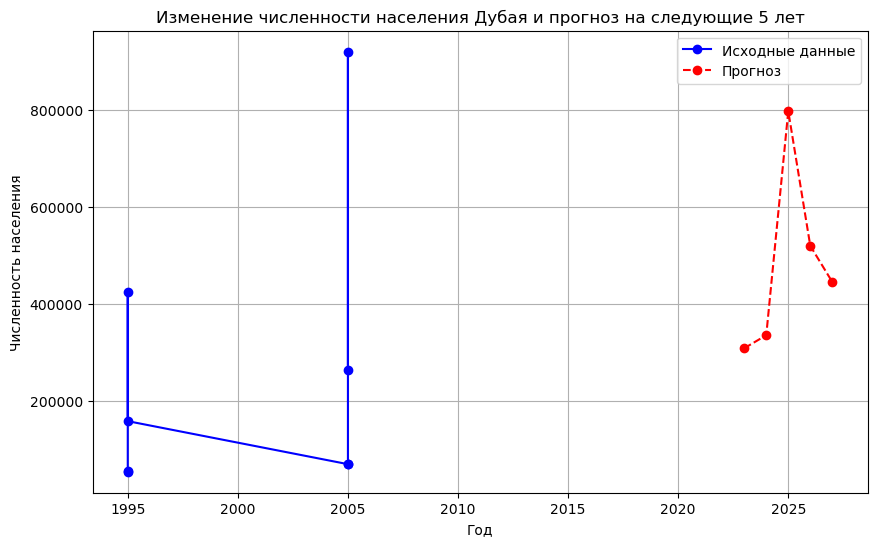

In [33]:
# Создание модели Holt-Winters
model = ExponentialSmoothing(last_10_years['value'], trend='add', seasonal='add', seasonal_periods=4)

# Обучение модели
model_fit = model.fit()

# Генерация прогноза на следующие 5 лет
forecast = model_fit.forecast(5)

# Построение графика с прогнозом
plt.figure(figsize=(10, 6))
plt.plot(last_10_years['year'], last_10_years['value'], marker='o', linestyle='-', color='b', label='Исходные данные')
plt.plot(range(2023, 2028), forecast, marker='o', linestyle='--', color='r', label='Прогноз')
plt.xlabel('Год')
plt.ylabel('Численность населения')
plt.title('Изменение численности населения Дубая и прогноз на следующие 5 лет')
plt.grid(True)
plt.legend()
plt.show()

## Выводы

**На основе датасета полученного с официального  портала правительства эмирата Дубай (https://bayanat.ae/en/Data), можно сделать следующие выводы:**

1) Данные в датасете представлены за период с 1975 по 2005 год;  
2) Общий рост населения ОАЭ рос стремительно за весь анализируемый период;   
3) В эмирате Дубай наблюдался отток населения в период с 1995 по 2004 год. Резкий рост численности населения Дубая начался в 2005 году;  
4) Прогнозная модель Хольта-Винтерса показывает, что в эмирате Дубай будет продолжаться как и прирост численности населения так и его убыль;  
5) Данный прогноз не является точным, так как отсутствуют данные за период с 2006 по 2023 год.  